Versão 2- Teste 1

In [ ]:
#%matplotlib inline
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#carregando o dataset
data_set = '/content/drive/My Drive/WESAD/'
s2_path = data_set + 'S2.pkl'
#modificação necessária pois os dados estavam em py2 e o ambiente usa py3
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [ ]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")

Equated


In [ ]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("BD combinado")

BD combinado


In [ ]:
df

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.9554,-0.2220,-0.5580,0.021423,-0.004440,5.250549,30.120758,-1.148987,0.0
1,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573,0.0
2,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039,0.0
3,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142,0.0
4,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130951,-1.161194,0.0
...,...,...,...,...,...,...,...,...,...
4255295,0.8750,-0.1234,-0.2974,-0.013138,0.020370,0.400162,31.457733,-1.063538,0.0
4255296,0.8750,-0.1262,-0.2988,-0.010345,0.019592,0.355911,31.476898,-1.106262,0.0
4255297,0.8718,-0.1238,-0.3042,-0.005447,-0.017166,0.360489,31.459229,-1.103210,0.0
4255298,0.8730,-0.1234,-0.3026,0.000137,-0.028976,0.365829,31.484283,-1.086426,0.0


In [ ]:
neutro = df.loc[df['w_label'] == 1]
stress = df.loc[df['w_label'] == 2]


p_loc = pd.concat([neutro, stress])
p_loc

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
214583,0.8914,-0.1102,-0.2576,0.030945,-0.003708,5.710983,29.083618,1.191711,1.0
214584,0.8926,-0.1086,-0.2544,0.033646,-0.014145,5.719376,29.122437,1.139832,1.0
214585,0.8930,-0.1094,-0.2580,0.033005,0.010208,5.706406,29.115234,1.141357,1.0
214586,0.8934,-0.1082,-0.2538,0.031815,0.012634,5.712509,29.126709,1.155090,1.0
214587,0.8930,-0.1096,-0.2570,0.030350,0.002060,5.727005,29.100861,1.133728,1.0
...,...,...,...,...,...,...,...,...,...
2021977,0.8760,-0.1346,-0.3020,0.001328,-0.004715,3.075409,31.163483,-1.161194,2.0
2021978,0.8770,-0.1352,-0.2998,0.003433,-0.003937,3.059769,31.090057,-1.124573,2.0
2021979,0.8806,-0.1334,-0.2978,0.003616,-0.009018,3.078079,31.098877,-1.097107,2.0
2021980,0.8778,-0.1314,-0.2964,0.003525,0.004944,3.058624,31.101807,-1.103210,2.0


In [ ]:
df_new = pd.DataFrame()

from scipy.signal import find_peaks,peak_widths
import numpy.fft as fft

In [ ]:
for i in range(int(len(p_loc)/700)):
    x = p_loc.iloc[i:i+int(len(p_loc)/700),:]
    mn_acc_x = x['c_ax'].mean()
    mn_acc_y = x['c_ay'].mean()
    mn_acc_z = x['c_az'].mean()
    std_acc_x = x['c_ax'].std()
    std_acc_y = x['c_ay'].std()
    std_acc_z = x['c_az'].std()
    mn_emg = x['c_emg'].mean()
    std_emg = x['c_emg'].std()
    max_emg = np.amax(x['c_ax'])
    min_emg = np.amin(x['c_ax']) 
    dr_emg = max_emg/min_emg
    med_emg = np.median(x['c_emg'])
    per_10_emg = np.percentile(x['c_emg'],10)
    per_90_emg = np.percentile(x['c_emg'],90)
    peaks,properties = find_peaks(x['c_emg'],height = 0)
    mn_pk_amp = np.mean(properties['peak_heights'])
    std_pk_amp = np.std(properties['peak_heights'])
    sum_pk_amp = np.sum(properties['peak_heights'])
    mn_temp = x['c_temp'].mean()
    std_temp = x['c_temp'].std()
    max_temp = x['c_temp'].max()
    min_temp = x['c_temp'].min()
    dr_temp = max_temp/min_temp
    mn_eda = x['c_eda'].mean()
    std_eda = x['c_eda'].std()
    max_eda = x['c_eda'].max()
    min_eda = x['c_eda'].min()
    dr_eda = max_eda/min_eda
    peaks,properties = find_peaks(x['c_eda'],height = 0)
    mn_scr = np.mean(properties['peak_heights'])
    std_scr = np.std(properties['peak_heights'])   
    num_scr = np.size(peaks)
    sum_scr = np.sum(properties['peak_heights'])
    width_scr = peak_widths(x['c_eda'], peaks, rel_height=0)
    ht_scr = properties['peak_heights']
    ar_scr = 0.5*np.matmul(ht_scr,width_scr[1])
    df_new = df_new.append({'mean_accx':mn_acc_x,'mean_accy':mn_acc_y,'mean_accz':mn_acc_z,'std_accx':std_acc_x,
                            'std_accy':std_acc_y,'std_accz':std_acc_z,'mean_emg':mn_emg,'std_emg':std_emg,
                             'median_emg':med_emg,'number_peaks':peaks.size, 
                            'median_emg':med_emg,'number_peaks':peaks.size, 
                            'mean_peak_amplitudes':mn_pk_amp,'std_peak_amplitude':std_pk_amp,'sum_peak_amplitude':sum_pk_amp,'mean_temp':mn_temp,
                            'std_temp':std_temp,'max_temp':max_temp,'min_temp':min_temp,'mean_eda':mn_eda,'std_eda':std_eda,
                            'max_eda':max_eda,'min_eda':min_eda,'mean_scr_peaks':mn_scr,'std_scr_peaks':std_scr,'total_scr_peaks':num_scr},ignore_index = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: PeakPropertyWarning: some peaks have a width of 0


In [ ]:
df_new

,max_eda,max_temp,mean_accx,mean_accy,mean_accz,mean_eda,mean_emg,mean_peak_amplitudes,mean_scr_peaks,mean_temp,median_emg,min_eda,min_temp,number_peaks,std_accx,std_accy,std_accz,std_eda,std_emg,std_peak_amplitude,std_scr_peaks,std_temp,sum_peak_amplitude,total_scr_peaks
0,5.756760,29.287872,0.881317,-0.122991,-0.263017,5.562593,-0.002687,0.018217,5.574400,29.134018,-0.002060,5.310822,29.082184,601.0,0.008996,0.013069,0.016360,0.075922,0.020273,0.012293,0.075106,0.029731,5.956924,601.0
1,5.756760,29.287872,0.881304,-0.123007,-0.263031,5.562443,-0.002702,0.018217,5.574158,29.134051,-0.002060,5.310822,29.082184,600.0,0.008998,0.013071,0.016366,0.075891,0.020284,0.012293,0.074935,0.029707,5.956924,600.0
2,5.756760,29.287872,0.881290,-0.123025,-0.263046,5.562298,-0.002702,0.018217,5.574158,29.134048,-0.002060,5.310822,29.082184,600.0,0.008999,0.013073,0.016369,0.075834,0.020283,0.012293,0.074935,0.029709,5.956924,600.0
3,5.756760,29.287872,0.881278,-0.123042,-0.263061,5.562147,-0.002711,0.018234,5.573977,29.134057,-0.002106,5.310822,29.082184,601.0,0.008997,0.013075,0.016377,0.075811,0.020281,0.012308,0.075003,0.029705,5.944290,601.0
4,5.756760,29.287872,0.881265,-0.123060,-0.263081,5.561996,-0.002723,0.018234,5.573722,29.134101,-0.002151,5.310822,29.082184,600.0,0.008996,0.013077,0.016387,0.075777,0.020278,0.012308,0.074805,0.029752,5.944290,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,5.476379,29.299408,0.875918,-0.127193,-0.279997,5.381519,-0.002730,0.013587,5.392633,29.146785,-0.001877,5.319977,29.100861,511.0,0.005326,0.008735,0.008920,0.030173,0.016315,0.010027,0.029721,0.028016,4.307236,511.0
1755,5.476379,29.299408,0.875918,-0.127188,-0.280005,5.381442,-0.002718,0.013587,5.392633,29.146771,-0.001877,5.319977,29.100861,511.0,0.005326,0.008731,0.008931,0.030130,0.016328,0.010027,0.029721,0.028018,4.307236,511.0
1756,5.476379,29.299408,0.875919,-0.127181,-0.280013,5.381387,-0.002724,0.013574,5.392633,29.146774,-0.001877,5.319977,29.100861,511.0,0.005325,0.008726,0.008941,0.030105,0.016323,0.010009,0.029721,0.028017,4.303070,511.0
1757,5.476379,29.299408,0.875922,-0.127175,-0.280020,5.381312,-0.002745,0.013574,5.392387,29.146812,-0.001923,5.319977,29.100861,511.0,0.005321,0.008723,0.008950,0.030094,0.016305,0.010009,0.029581,0.028042,4.303070,511.0


In [ ]:
label = pd.DataFrame(columns = ['neutro', 'stress'])

In [ ]:
for i in range(2):
               y = (i+1)*np.ones(int(len(df_new)/2))
               label = label.append(pd.DataFrame(y))

In [ ]:
label = label.iloc[:,0]

In [ ]:
label = label.reset_index()

In [ ]:
label = label.iloc[:, -1]

In [ ]:
label

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1753    2.0
1754    2.0
1755    2.0
1756    2.0
1757    2.0
Name: 0, Length: 1758, dtype: float64

In [ ]:
df1 = pd.concat([df_new,label],axis = 1)

In [ ]:
df1.iloc[:,-1]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1754    2.0
1755    2.0
1756    2.0
1757    2.0
1758    NaN
Name: 0, Length: 1759, dtype: float64

In [ ]:
df1 = df1.rename(columns={0: "label"})

In [ ]:
df1

,max_eda,max_temp,mean_accx,mean_accy,mean_accz,mean_eda,mean_emg,mean_peak_amplitudes,mean_scr_peaks,mean_temp,median_emg,min_eda,min_temp,number_peaks,std_accx,std_accy,std_accz,std_eda,std_emg,std_peak_amplitude,std_scr_peaks,std_temp,sum_peak_amplitude,total_scr_peaks,label
0,5.756760,29.287872,0.881317,-0.122991,-0.263017,5.562593,-0.002687,0.018217,5.574400,29.134018,-0.002060,5.310822,29.082184,601.0,0.008996,0.013069,0.016360,0.075922,0.020273,0.012293,0.075106,0.029731,5.956924,601.0,1.0
1,5.756760,29.287872,0.881304,-0.123007,-0.263031,5.562443,-0.002702,0.018217,5.574158,29.134051,-0.002060,5.310822,29.082184,600.0,0.008998,0.013071,0.016366,0.075891,0.020284,0.012293,0.074935,0.029707,5.956924,600.0,1.0
2,5.756760,29.287872,0.881290,-0.123025,-0.263046,5.562298,-0.002702,0.018217,5.574158,29.134048,-0.002060,5.310822,29.082184,600.0,0.008999,0.013073,0.016369,0.075834,0.020283,0.012293,0.074935,0.029709,5.956924,600.0,1.0
3,5.756760,29.287872,0.881278,-0.123042,-0.263061,5.562147,-0.002711,0.018234,5.573977,29.134057,-0.002106,5.310822,29.082184,601.0,0.008997,0.013075,0.016377,0.075811,0.020281,0.012308,0.075003,0.029705,5.944290,601.0,1.0
4,5.756760,29.287872,0.881265,-0.123060,-0.263081,5.561996,-0.002723,0.018234,5.573722,29.134101,-0.002151,5.310822,29.082184,600.0,0.008996,0.013077,0.016387,0.075777,0.020278,0.012308,0.074805,0.029752,5.944290,600.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,5.476379,29.299408,0.875918,-0.127193,-0.279997,5.381519,-0.002730,0.013587,5.392633,29.146785,-0.001877,5.319977,29.100861,511.0,0.005326,0.008735,0.008920,0.030173,0.016315,0.010027,0.029721,0.028016,4.307236,511.0,2.0
1755,5.476379,29.299408,0.875918,-0.127188,-0.280005,5.381442,-0.002718,0.013587,5.392633,29.146771,-0.001877,5.319977,29.100861,511.0,0.005326,0.008731,0.008931,0.030130,0.016328,0.010027,0.029721,0.028018,4.307236,511.0,2.0
1756,5.476379,29.299408,0.875919,-0.127181,-0.280013,5.381387,-0.002724,0.013574,5.392633,29.146774,-0.001877,5.319977,29.100861,511.0,0.005325,0.008726,0.008941,0.030105,0.016323,0.010009,0.029721,0.028017,4.303070,511.0,2.0
1757,5.476379,29.299408,0.875922,-0.127175,-0.280020,5.381312,-0.002745,0.013574,5.392387,29.146812,-0.001923,5.319977,29.100861,511.0,0.005321,0.008723,0.008950,0.030094,0.016305,0.010009,0.029581,0.028042,4.303070,511.0,2.0


In [ ]:
df1 = df1.drop_duplicates(keep = 'first')

In [ ]:
df1

,max_eda,max_temp,mean_accx,mean_accy,mean_accz,mean_eda,mean_emg,mean_peak_amplitudes,mean_scr_peaks,mean_temp,median_emg,min_eda,min_temp,number_peaks,std_accx,std_accy,std_accz,std_eda,std_emg,std_peak_amplitude,std_scr_peaks,std_temp,sum_peak_amplitude,total_scr_peaks,label
0,5.756760,29.287872,0.881317,-0.122991,-0.263017,5.562593,-0.002687,0.018217,5.574400,29.134018,-0.002060,5.310822,29.082184,601.0,0.008996,0.013069,0.016360,0.075922,0.020273,0.012293,0.075106,0.029731,5.956924,601.0,1.0
1,5.756760,29.287872,0.881304,-0.123007,-0.263031,5.562443,-0.002702,0.018217,5.574158,29.134051,-0.002060,5.310822,29.082184,600.0,0.008998,0.013071,0.016366,0.075891,0.020284,0.012293,0.074935,0.029707,5.956924,600.0,1.0
2,5.756760,29.287872,0.881290,-0.123025,-0.263046,5.562298,-0.002702,0.018217,5.574158,29.134048,-0.002060,5.310822,29.082184,600.0,0.008999,0.013073,0.016369,0.075834,0.020283,0.012293,0.074935,0.029709,5.956924,600.0,1.0
3,5.756760,29.287872,0.881278,-0.123042,-0.263061,5.562147,-0.002711,0.018234,5.573977,29.134057,-0.002106,5.310822,29.082184,601.0,0.008997,0.013075,0.016377,0.075811,0.020281,0.012308,0.075003,0.029705,5.944290,601.0,1.0
4,5.756760,29.287872,0.881265,-0.123060,-0.263081,5.561996,-0.002723,0.018234,5.573722,29.134101,-0.002151,5.310822,29.082184,600.0,0.008996,0.013077,0.016387,0.075777,0.020278,0.012308,0.074805,0.029752,5.944290,600.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,5.476379,29.299408,0.875918,-0.127193,-0.279997,5.381519,-0.002730,0.013587,5.392633,29.146785,-0.001877,5.319977,29.100861,511.0,0.005326,0.008735,0.008920,0.030173,0.016315,0.010027,0.029721,0.028016,4.307236,511.0,2.0
1755,5.476379,29.299408,0.875918,-0.127188,-0.280005,5.381442,-0.002718,0.013587,5.392633,29.146771,-0.001877,5.319977,29.100861,511.0,0.005326,0.008731,0.008931,0.030130,0.016328,0.010027,0.029721,0.028018,4.307236,511.0,2.0
1756,5.476379,29.299408,0.875919,-0.127181,-0.280013,5.381387,-0.002724,0.013574,5.392633,29.146774,-0.001877,5.319977,29.100861,511.0,0.005325,0.008726,0.008941,0.030105,0.016323,0.010009,0.029721,0.028017,4.303070,511.0,2.0
1757,5.476379,29.299408,0.875922,-0.127175,-0.280020,5.381312,-0.002745,0.013574,5.392387,29.146812,-0.001923,5.319977,29.100861,511.0,0.005321,0.008723,0.008950,0.030094,0.016305,0.010009,0.029581,0.028042,4.303070,511.0,2.0


In [ ]:
df1.iloc[:,-1]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1754    2.0
1755    2.0
1756    2.0
1757    2.0
1758    NaN
Name: label, Length: 1759, dtype: float64

In [ ]:
df1.isna()

,max_eda,max_temp,mean_accx,mean_accy,mean_accz,mean_eda,mean_emg,mean_peak_amplitudes,mean_scr_peaks,mean_temp,median_emg,min_eda,min_temp,number_peaks,std_accx,std_accy,std_accz,std_eda,std_emg,std_peak_amplitude,std_scr_peaks,std_temp,sum_peak_amplitude,total_scr_peaks,label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1755,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1756,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1757,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df1.isna().sum()

max_eda                 0
max_temp                0
mean_accx               0
mean_accy               0
mean_accz               0
mean_eda                0
mean_emg                0
mean_peak_amplitudes    0
mean_scr_peaks          0
mean_temp               0
median_emg              0
min_eda                 0
min_temp                0
number_peaks            0
std_accx                0
std_accy                0
std_accz                0
std_eda                 0
std_emg                 0
std_peak_amplitude      0
std_scr_peaks           0
std_temp                0
sum_peak_amplitude      0
total_scr_peaks         0
label                   1
dtype: int64

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.isna().sum().sum()

0

In [ ]:
df1

,max_eda,max_temp,mean_accx,mean_accy,mean_accz,mean_eda,mean_emg,mean_peak_amplitudes,mean_scr_peaks,mean_temp,median_emg,min_eda,min_temp,number_peaks,std_accx,std_accy,std_accz,std_eda,std_emg,std_peak_amplitude,std_scr_peaks,std_temp,sum_peak_amplitude,total_scr_peaks,label
0,5.756760,29.287872,0.881317,-0.122991,-0.263017,5.562593,-0.002687,0.018217,5.574400,29.134018,-0.002060,5.310822,29.082184,601.0,0.008996,0.013069,0.016360,0.075922,0.020273,0.012293,0.075106,0.029731,5.956924,601.0,1.0
1,5.756760,29.287872,0.881304,-0.123007,-0.263031,5.562443,-0.002702,0.018217,5.574158,29.134051,-0.002060,5.310822,29.082184,600.0,0.008998,0.013071,0.016366,0.075891,0.020284,0.012293,0.074935,0.029707,5.956924,600.0,1.0
2,5.756760,29.287872,0.881290,-0.123025,-0.263046,5.562298,-0.002702,0.018217,5.574158,29.134048,-0.002060,5.310822,29.082184,600.0,0.008999,0.013073,0.016369,0.075834,0.020283,0.012293,0.074935,0.029709,5.956924,600.0,1.0
3,5.756760,29.287872,0.881278,-0.123042,-0.263061,5.562147,-0.002711,0.018234,5.573977,29.134057,-0.002106,5.310822,29.082184,601.0,0.008997,0.013075,0.016377,0.075811,0.020281,0.012308,0.075003,0.029705,5.944290,601.0,1.0
4,5.756760,29.287872,0.881265,-0.123060,-0.263081,5.561996,-0.002723,0.018234,5.573722,29.134101,-0.002151,5.310822,29.082184,600.0,0.008996,0.013077,0.016387,0.075777,0.020278,0.012308,0.074805,0.029752,5.944290,600.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,5.476379,29.299408,0.875917,-0.127200,-0.279991,5.381594,-0.002736,0.013587,5.392860,29.146727,-0.001923,5.319977,29.100861,511.0,0.005327,0.008739,0.008914,0.030187,0.016313,0.010027,0.029838,0.027967,4.307236,511.0,2.0
1754,5.476379,29.299408,0.875918,-0.127193,-0.279997,5.381519,-0.002730,0.013587,5.392633,29.146785,-0.001877,5.319977,29.100861,511.0,0.005326,0.008735,0.008920,0.030173,0.016315,0.010027,0.029721,0.028016,4.307236,511.0,2.0
1755,5.476379,29.299408,0.875918,-0.127188,-0.280005,5.381442,-0.002718,0.013587,5.392633,29.146771,-0.001877,5.319977,29.100861,511.0,0.005326,0.008731,0.008931,0.030130,0.016328,0.010027,0.029721,0.028018,4.307236,511.0,2.0
1756,5.476379,29.299408,0.875919,-0.127181,-0.280013,5.381387,-0.002724,0.013574,5.392633,29.146774,-0.001877,5.319977,29.100861,511.0,0.005325,0.008726,0.008941,0.030105,0.016323,0.010009,0.029721,0.028017,4.303070,511.0,2.0


In [ ]:
df1 = pd.DataFrame(df1)

In [ ]:
df1

,max_eda,max_temp,mean_accx,mean_accy,mean_accz,mean_eda,mean_emg,mean_peak_amplitudes,mean_scr_peaks,mean_temp,median_emg,min_eda,min_temp,number_peaks,std_accx,std_accy,std_accz,std_eda,std_emg,std_peak_amplitude,std_scr_peaks,std_temp,sum_peak_amplitude,total_scr_peaks,label
0,5.756760,29.287872,0.881317,-0.122991,-0.263017,5.562593,-0.002687,0.018217,5.574400,29.134018,-0.002060,5.310822,29.082184,601.0,0.008996,0.013069,0.016360,0.075922,0.020273,0.012293,0.075106,0.029731,5.956924,601.0,1.0
1,5.756760,29.287872,0.881304,-0.123007,-0.263031,5.562443,-0.002702,0.018217,5.574158,29.134051,-0.002060,5.310822,29.082184,600.0,0.008998,0.013071,0.016366,0.075891,0.020284,0.012293,0.074935,0.029707,5.956924,600.0,1.0
2,5.756760,29.287872,0.881290,-0.123025,-0.263046,5.562298,-0.002702,0.018217,5.574158,29.134048,-0.002060,5.310822,29.082184,600.0,0.008999,0.013073,0.016369,0.075834,0.020283,0.012293,0.074935,0.029709,5.956924,600.0,1.0
3,5.756760,29.287872,0.881278,-0.123042,-0.263061,5.562147,-0.002711,0.018234,5.573977,29.134057,-0.002106,5.310822,29.082184,601.0,0.008997,0.013075,0.016377,0.075811,0.020281,0.012308,0.075003,0.029705,5.944290,601.0,1.0
4,5.756760,29.287872,0.881265,-0.123060,-0.263081,5.561996,-0.002723,0.018234,5.573722,29.134101,-0.002151,5.310822,29.082184,600.0,0.008996,0.013077,0.016387,0.075777,0.020278,0.012308,0.074805,0.029752,5.944290,600.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,5.476379,29.299408,0.875917,-0.127200,-0.279991,5.381594,-0.002736,0.013587,5.392860,29.146727,-0.001923,5.319977,29.100861,511.0,0.005327,0.008739,0.008914,0.030187,0.016313,0.010027,0.029838,0.027967,4.307236,511.0,2.0
1754,5.476379,29.299408,0.875918,-0.127193,-0.279997,5.381519,-0.002730,0.013587,5.392633,29.146785,-0.001877,5.319977,29.100861,511.0,0.005326,0.008735,0.008920,0.030173,0.016315,0.010027,0.029721,0.028016,4.307236,511.0,2.0
1755,5.476379,29.299408,0.875918,-0.127188,-0.280005,5.381442,-0.002718,0.013587,5.392633,29.146771,-0.001877,5.319977,29.100861,511.0,0.005326,0.008731,0.008931,0.030130,0.016328,0.010027,0.029721,0.028018,4.307236,511.0,2.0
1756,5.476379,29.299408,0.875919,-0.127181,-0.280013,5.381387,-0.002724,0.013574,5.392633,29.146774,-0.001877,5.319977,29.100861,511.0,0.005325,0.008726,0.008941,0.030105,0.016323,0.010009,0.029721,0.028017,4.303070,511.0,2.0


In [ ]:
x = df1.drop(['label'], axis=1)
y = df1['label']

In [ ]:
df1.columns

Index(['max_eda', 'max_temp', 'mean_accx', 'mean_accy', 'mean_accz',
       'mean_eda', 'mean_emg', 'mean_peak_amplitudes', 'mean_scr_peaks',
       'mean_temp', 'median_emg', 'min_eda', 'min_temp', 'number_peaks',
       'std_accx', 'std_accy', 'std_accz', 'std_eda', 'std_emg',
       'std_peak_amplitude', 'std_scr_peaks', 'std_temp', 'sum_peak_amplitude',
       'total_scr_peaks', 'label'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# padronizar as colunas numéricas
X = StandardScaler().fit_transform(x)
 
# label encoder na variável alvo
Y = LabelEncoder().fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1230, 24) (528, 24) (1230,) (528,)


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras. layers import Activation
from keras.layers.core import Dense

In [ ]:
model = Sequential()
model.add(Dense(24, input_shape=(24,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense (1, activation='relu'))

In [ ]:
model.summary()

print("inputs: " , model.input_shape)
print("outputs: ", model.output_shape)
print("actual inputs: ", np.shape(x_train))
print("actual outputs: ", np.shape(y_train))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                750       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________
inputs:  (None, 24)
outputs:  (None, 1)
actual inputs:  (1230, 24)
actual outputs:  (1230,)


In [ ]:
from keras.optimizers import Adam
from keras.optimizers import SGD
opt =tf.keras.optimizers.RMSprop(0.001)
#l = 'categorical_crossentropy'
#l = 'binary_crossentropy'
#model.compile(loss= l, optimizer=opt, metrics=['accuracy'])
model.compile(Adam(lr=.0001), loss='mse',  metrics=['mae', 'mse', 'accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=10, epochs=3, shuffle=True, verbose=2)

Epoch 1/3
99/99 - 0s - loss: 0.2954 - mae: 0.4713 - mse: 0.2954 - accuracy: 0.5681 - val_loss: 0.0908 - val_mae: 0.2625 - val_mse: 0.0908 - val_accuracy: 0.9472
Epoch 2/3
99/99 - 0s - loss: 0.0610 - mae: 0.1993 - mse: 0.0610 - accuracy: 0.9614 - val_loss: 0.0433 - val_mae: 0.1548 - val_mse: 0.0433 - val_accuracy: 0.9675
Epoch 3/3
99/99 - 0s - loss: 0.0353 - mae: 0.1241 - mse: 0.0353 - accuracy: 0.9715 - val_loss: 0.0298 - val_mae: 0.1090 - val_mse: 0.0298 - val_accuracy: 0.9756


In [ ]:
previsoes = model.predict(x_test)
previsoes = (previsoes >0.5)
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(y_test, previsoes)
matriz = confusion_matrix(y_test, previsoes)
resultado = model.evaluate(x_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.0419 - mae: 0.1151 - mse: 0.0419 - accuracy: 0.9602


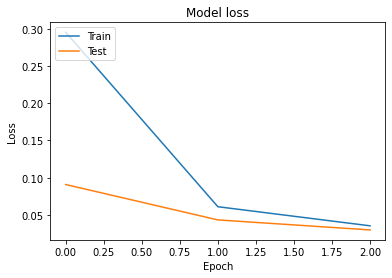

In [ ]:
# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
previsoes = model.predict(x_test)
previsoes = (previsoes >0.5)
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(y_test, previsoes)
matriz = confusion_matrix(y_test, previsoes)
resultado = model.evaluate(x_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.0419 - mae: 0.1151 - mse: 0.0419 - accuracy: 0.9602


In [ ]:
precisao

0.9602272727272727

In [ ]:
resultado

[0.0419481135904789,
 0.1151127815246582,
 0.0419481135904789,
 0.9602272510528564]

In [ ]:
matriz

array([[266,  15],
       [  6, 241]])

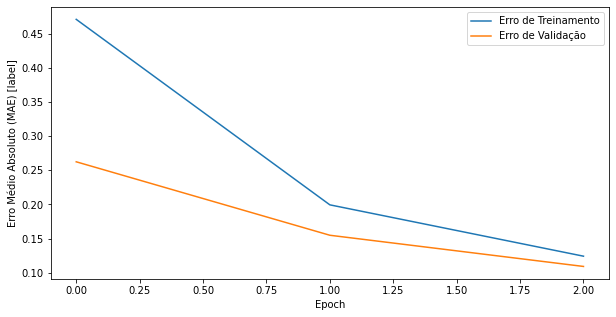

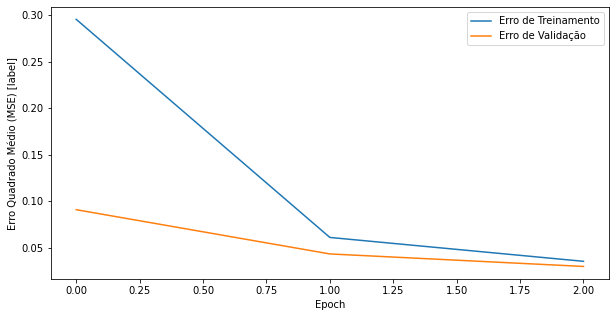

In [ ]:
import matplotlib.pyplot as plt
def plota_historico(history, limita=False):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Erro Médio Absoluto (MAE) [label]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Erro de Treinamento')
  plt.legend(loc='best', fontsize=25)
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Erro de Validação')
  plt.legend(loc='best', fontsize=25)
  if limita == True:
    plt.ylim([0,5])
  plt.legend()

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Erro Quadrado Médio (MSE) [label]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Erro de Treinamento')
  plt.legend(loc='best', fontsize=25)
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Erro de Validação')
  plt.legend(loc='best', fontsize=25)
  if limita == True:
    plt.ylim([0,20])
  plt.legend()
  plt.show()


plota_historico(history)

In [ ]:
historico = pd.DataFrame(history.history)
historico ['epoch'] = history.epoch
historico.tail()

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
0,0.295377,0.471258,0.295377,0.568089,0.090812,0.262459,0.090812,0.947154,0
1,0.060986,0.199347,0.060986,0.961382,0.043262,0.154771,0.043262,0.967480,1
2,0.035328,0.124083,0.035328,0.971545,0.029817,0.109043,0.029817,0.975610,2
